In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

trip_data_file = "data/trip_data_4.csv"
trip_fare_file = "data/trip_fare_4.csv"

trips = pd.read_csv(trip_data_file)
fares = pd.read_csv(trip_fare_file)

/home/ma_emali/anaconda2/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
full_tripdata = pd.merge(left=trips,right=fares, how='left', left_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'], right_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'])
full_tripdata = full_tripdata.drop_duplicates()

In [4]:
full_tripdata.columns

Index([u'medallion', u' hack_license', u' vendor_id', u' rate_code',
       u' store_and_fwd_flag', u' pickup_datetime', u' dropoff_datetime',
       u' passenger_count', u' trip_time_in_secs', u' trip_distance',
       u' pickup_longitude', u' pickup_latitude', u' dropoff_longitude',
       u' dropoff_latitude', u' payment_type', u' fare_amount', u' surcharge',
       u' mta_tax', u' tip_amount', u' tolls_amount', u' total_amount'],
      dtype='object')

# Prepare Time

In [5]:
full_tripdata[" pickup_datetime"] = pd.to_datetime(full_tripdata[" pickup_datetime"])
full_tripdata[" dropoff_datetime"] = pd.to_datetime(full_tripdata[" dropoff_datetime"])

full_tripdata["weekday"] = full_tripdata[" pickup_datetime"].dt.dayofweek
full_tripdata["hourofday"] = full_tripdata[" pickup_datetime"].dt.hour

In [6]:
full_tripdata[" pickup_datetime"].describe()

count                15101650
unique                2212633
top       2013-04-19 22:41:00
freq                      439
first     2013-04-01 00:00:00
last      2013-04-30 23:59:58
Name:  pickup_datetime, dtype: object

In [7]:
import seaborn as sns

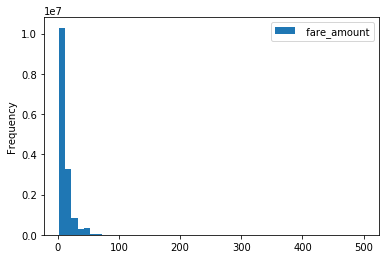

In [8]:
full_tripdata[[" fare_amount"]].plot.hist(bins=50)

/home/ma_emali/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


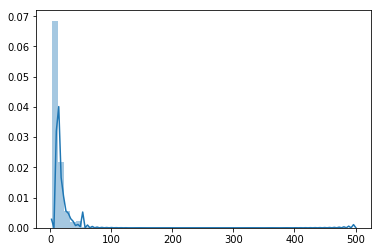

In [9]:
sns.distplot(full_tripdata[[" fare_amount"]],norm_hist=True)

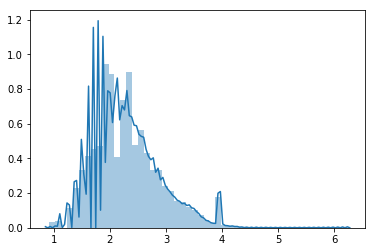

In [10]:
full_tripdata["log_fare_amount"] = np.log(full_tripdata[" fare_amount"])
#full_tripdata[["log_fare_amount"]].plot.hist(bins=50)
sns.distplot(full_tripdata[["log_fare_amount"]],norm_hist=True)

In [11]:
full_tripdata = full_tripdata.drop(columns=['medallion',' hack_license',' vendor_id',' rate_code',' store_and_fwd_flag'])

In [12]:
full_tripdata.columns

Index([u' pickup_datetime', u' dropoff_datetime', u' passenger_count',
       u' trip_time_in_secs', u' trip_distance', u' pickup_longitude',
       u' pickup_latitude', u' dropoff_longitude', u' dropoff_latitude',
       u' payment_type', u' fare_amount', u' surcharge', u' mta_tax',
       u' tip_amount', u' tolls_amount', u' total_amount', u'weekday',
       u'hourofday', u'log_fare_amount'],
      dtype='object')

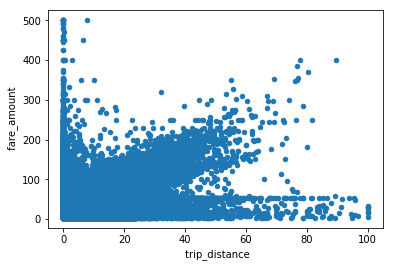

In [13]:
columnName = ' trip_distance'

data = pd.concat([full_tripdata[' fare_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' fare_amount')

In [14]:
#check data whose trip distance is 0 

zero_distance = full_tripdata.loc[(full_tripdata[' trip_distance'] == 0)]

zero_distance.describe()

,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,weekday,hourofday,log_fare_amount
count,112574.000000,112574.000000,112574.0,112574.000000,112574.000000,112428.000000,112428.000000,112574.000000,112574.000000,112574.000000,112574.000000,112574.000000,112574.000000,112574.000000,112574.000000,112574.000000
mean,1.361771,434.201743,0.0,-61.842935,34.056795,-56.451246,31.087191,22.217774,0.219120,0.436153,2.562753,0.728185,26.163985,2.956846,12.578588,2.359961
std,0.924213,758.008016,0.0,27.409949,15.222716,31.479355,17.432773,29.096689,0.341642,0.166875,5.674802,2.054799,32.756457,2.057488,6.610865,1.240157
min,0.000000,0.000000,0.0,-79.313148,-73.954559,-79.313171,-73.938347,2.500000,0.000000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.916291
25%,1.000000,2.000000,0.0,-73.987427,40.648392,-73.986742,40.641563,2.500000,0.000000,0.500000,0.000000,0.000000,4.000000,1.000000,7.000000,0.916291
50%,1.000000,60.000000,0.0,-73.962673,40.744041,-73.962700,40.741465,9.000000,0.000000,0.500000,0.000000,0.000000,11.000000,3.000000,13.000000,2.197225
75%,1.000000,566.000000,0.0,-73.790054,40.762871,-73.776749,40.761021,38.000000,0.500000,0.500000,2.400000,0.000000,45.380000,5.000000,18.000000,3.637586
max,6.000000,10607.000000,0.0,73.937775,46.331844,73.937782,46.331844,500.000000,9.000000,0.500000,198.000000,20.000000,600.000000,6.000000,23.000000,6.214608


In [15]:
columnName = ' trip_distance'
print full_tripdata[columnName].describe()

#full_tripdata.astype(bool).sum(axis=0)

count    1.510165e+07
mean     2.863119e+00
std      3.344897e+00
min      0.000000e+00
25%      1.040000e+00
50%      1.780000e+00
75%      3.200000e+00
max      1.000000e+02
Name:  trip_distance, dtype: float64


# Remove trips whose trip_time, trip_distance, hour, weekday, coordinates is 0

In [16]:
full_tripdata = full_tripdata.loc[(full_tripdata[' pickup_longitude'] != 0) & (full_tripdata[' pickup_latitude'] != 0) & (full_tripdata[' dropoff_latitude'] != 0) & (full_tripdata[' dropoff_latitude'] != 0)]
#full_tripdata = full_tripdata.loc[(full_tripdata[' pickup_longitude'] > -72.0) & (full_tripdata[' pickup_latitude'] < 30.0) & (full_tripdata[' dropoff_latitude'] > -72.0) & (full_tripdata[' dropoff_latitude'] < 30.0)]

full_tripdata = full_tripdata.loc[(full_tripdata[' trip_distance'] != 0) & (full_tripdata[' trip_time_in_secs'] != 0)]

#full_tripdata = full_tripdata.loc[(full_tripdata['weekday'] != 0) & (full_tripdata['hourofday'] != 0)]

In [17]:
#remove dirty data of coordinates
full_tripdata = full_tripdata.loc[(full_tripdata[' pickup_longitude'] < -72.0) 
                                   #& (full_tripdata[' pickup_latitude'] > 30.0) 
                                   #& (full_tripdata[' dropoff_latitude'] < -72.0) 
                                   & (full_tripdata[' dropoff_latitude'] > 30.0)]


# Correlation between trip distance and tip amount

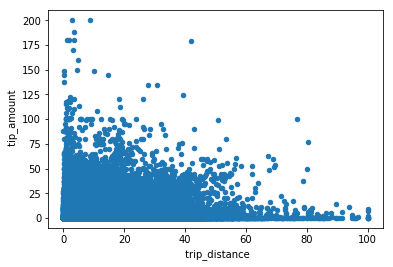

In [18]:
columnName = ' trip_distance'

data = pd.concat([full_tripdata[' tip_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' tip_amount')

# Correlation between trip time and tip amount

In [ ]:
columnName = ' trip_time_in_secs'

data = pd.concat([full_tripdata[' tip_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' tip_amount')

# Correlation between trip distance and fare amount

In [ ]:
columnName = ' trip_distance'

data = pd.concat([full_tripdata[' fare_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' fare_amount')

# Correlation between trip time and fare amount

In [ ]:
columnName = ' trip_time_in_secs'

data = pd.concat([full_tripdata[' fare_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' fare_amount')

# Relationship with categorical features

In [ ]:

columnName = ' passenger_count'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
#fig.axis(ymin=0, ymax=100);

# Conclusion , passenger_count has no correlation with fare_amount

In [ ]:
columnName = ' passenger_count'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
#fig.axis(ymin=0, ymax=35);

# Conclusion , passenger_count has no correlation with tip_amount

In [ ]:
columnName = ' payment_type'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
#fig.axis(ymin=0, ymax=35);

# Conclusion , payment_tyep has some correlation with fare_amount, UNK is more frequently used for higher fare amount

In [ ]:
columnName = ' payment_type'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
#fig.axis(ymin=0, ymax=35);

# People are more willing to give tip when using card or "UNK"

In [ ]:
full_tripdata.columns

# Correlation between weekday and fare amount

In [ ]:
columnName = 'weekday'
print full_tripdata[columnName].describe()
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=35);

# Correlation between weekday and tip amount

In [ ]:
columnName = 'weekday'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
#fig.axis(ymin=0, ymax=35);

# Correlation between hour of the day and fare amount

In [ ]:
columnName = 'hourofday'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
#fig.axis(ymin=0, ymax=100);

# Correlation between hour of the day and fare amount

In [ ]:
columnName = 'hourofday'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(16, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
#fig.axis(ymin=0, ymax=35);

# Correlation matrix

In [ ]:
corrmat = full_tripdata.corr()

k = 18
cols = corrmat.nlargest(k, ' total_amount')[' total_amount'].index
cm = np.corrcoef(full_tripdata[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Process Coordinates 

In [ ]:
import pickle
from sklearn.cluster import KMeans

kmeammodel = pickle.load(open('location_cluster_kmean', 'rb'))

In [ ]:
pickupLocations = full_tripdata.iloc[:,5:7]


In [ ]:
full_tripdata["pickupLoc"] = kmeammodel.predict(pickupLocations.as_matrix())

In [ ]:
columnName = 'pickupLoc'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(80, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
fig.axis(ymin=0, ymax=20);

In [ ]:
dropoffLocations = full_tripdata.iloc[:,7:9]
print dropoffLocations.columns
full_tripdata["dropoffLoc"] = kmeammodel.predict(dropoffLocations.as_matrix())

In [ ]:
columnName = 'dropoffLoc'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(80, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=75);

In [ ]:
training = full_tripdata.drop(columns=[' pickup_datetime',
                                       ' dropoff_datetime',
                                       ' trip_time_in_secs',
                                       ' trip_distance',
                                       ' dropoff_longitude',
                                       ' dropoff_latitude',
                                       ' surcharge',
                                       ' mta_tax',
                                       ' tolls_amount',
                                       ' total_amount',
                                       ' passenger_count',
                                       ' payment_type',
                                       ' pickup_longitude',
                                       ' pickup_latitude'])

# Correlation matrix with only fare , tip , locations, weekday and hourofday

In [ ]:
corrmat = training.corr()

k = 6
cols = corrmat.nlargest(k, ' fare_amount')[' fare_amount'].index
cm = np.corrcoef(full_tripdata[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
training['weekday'] = training['weekday'].astype('category')
training['hourofday'] = training['hourofday'].astype('category')
training['pickupLoc'] = training['pickupLoc'].astype('category')
training['dropoffLoc'] = training['dropoffLoc'].astype('category')

In [ ]:
data = pd.concat([full_tripdata[' fare_amount'], full_tripdata["pickupLoc"], full_tripdata["dropoffLoc"]],axis=1)

data.groupby(by=['pickupLoc','dropoffLoc']).count().sort_values(by=[" fare_amount"],ascending=False).head()


# h. Which trip has the highest standard deviation of travel time?

In [ ]:
trips = full_tripdata.copy()

In [ ]:
trips.groupby(by=[' pickup_longitude',' pickup_latitude',' dropoff_longitude',' dropoff_latitude']).count().sort_values(by=[" trip_time_in_secs"],ascending=False).head()

# Only looking at coordinates cannot take into account of very close pick up and drop off locations

In [ ]:
training["trip_time_in_secs"] = full_tripdata.iloc[:,3]
training["trip_distance"] = full_tripdata.iloc[:,4]

In [ ]:
training.groupby(by=['pickupLoc','dropoffLoc']).count().sort_values(by=["trip_time_in_secs"],ascending=False).head()

In [ ]:
training.groupby(by=['pickupLoc','dropoffLoc']).std().sort_values(by=["trip_time_in_secs"],ascending=False).head()

In [ ]:
biggestdeviationTrips = training.loc[(training['pickupLoc'] == 24) & (training['dropoffLoc'] == 49)]
biggestdeviationTrips

In [ ]:
biggestdeviationTrips = full_tripdata.loc[(full_tripdata['pickupLoc'] == 24) & (full_tripdata['dropoffLoc'] == 49)]
biggestdeviationTrips

# i. Which trip has most consistent fares?

In [ ]:
training.groupby(by=['pickupLoc','dropoffLoc']).std().sort_values(by=[" fare_amount"]).head(10)

In [ ]:
fare_std = training.groupby(by=['pickupLoc','dropoffLoc']).std().sort_values(by=[" fare_amount"])
fare_std = fare_std.loc[fare_std[" fare_amount"] == 0]
print fare_std.describe()
fare_std

In [ ]:
biggestdeviationTrips = full_tripdata.loc[(full_tripdata['pickupLoc'] == 2) & (full_tripdata['dropoffLoc'] == 16)]
biggestdeviationTrips

# g. What are the top 10 busiest locations of the city?

In [ ]:
busiestLoc = training.groupby(by=['pickupLoc']).count().sort_values(by=[" fare_amount"],ascending=False).head(10)
busiestLoc

In [ ]:
busiestLoc_cluster_centers = [kmeammodel.cluster_centers_[x] for x in busiestLoc.index]
print busiestLoc_cluster_centers

#pickup = full_tripdata.iloc[:,5:7]
#pickup.plot.scatter(x=" pickup_longitude",y=" pickup_latitude",figsize=(15,15),ylim=(40.62,40.87))
#print pickup.describe()
#pickup = pickup.as_matrix()
#print pickup.describe()
#fig = plt.figure(figsize=(15,15))
#ax1 = fig.add_subplot(111)
#ax1.scatter(pickup[:,0], pickup[:,1], s=10, c='b', marker="s", label='loc')
#ax1.scatter(busiestLoc_cluster_centers[:,0],busiestLoc_cluster_centers[:,1], s=120, c='r', marker="o", label='center')
#plt.legend(loc='upper left');
#plt.show()